In [1]:
import lmdb
import example_pb2
from meta import Meta
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_lmdb_dir = 'data/train.lmdb'
reader = lmdb.open(path_to_lmdb_dir)
txn = reader.begin()
cursor = txn.cursor()

In [3]:
cursor.next()
key, value = cursor.item()
example = example_pb2.Example()
example.ParseFromString(value)
print 'key:', key

key: 00000001


In [4]:
image = np.fromstring(example.image, dtype=np.uint8)
label = example.label

6


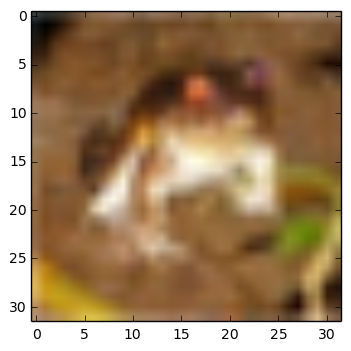

In [5]:
imshow(image.reshape([32, 32, 3]))
print label

In [6]:
meta = Meta()
meta.load('data/lmdb_meta.json')
print meta.categories[label]

frog


In [7]:
cursor.close()
reader.close()